# Extracting data from supercomputer

In [2]:
import numpy as np

Lx = 120
Ly = 8
U = 1
gamma = 0.1



val = np.loadtxt('data/eig_val_2N_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')
vec = np.loadtxt('data/eig_vec_2N_clean_dope30_L'+str(Lx)+'W'+str(Ly)+'_U'+str(U)+'_gamma'+str(gamma)+'.txt')

# Normalization
vec_norm = np.zeros((Lx*Ly*2, 101))
for i in range(101):
    vec_ele = vec[:, i]
    vec_ele = vec_ele/np.linalg.norm(vec_ele)
    vec_norm[:, i] = vec_ele

vec_up = vec_norm[0:(Lx*Ly), :]
vec_dn = vec_norm[(Lx*Ly):(2*Lx*Ly), :]

val

array([-1.00633864e-01, -9.89601983e-02, -9.37887379e-02, -9.23330241e-02,
       -9.14547097e-02, -8.87104221e-02, -8.60443751e-02, -7.71587663e-02,
       -7.57160683e-02, -6.92055442e-02, -6.44932949e-02, -6.44641339e-02,
       -5.43784295e-02, -5.29238413e-02, -4.85824245e-02, -4.18300333e-02,
       -3.52707114e-02, -3.51723637e-02, -2.96131263e-02, -2.92932312e-02,
       -3.74307320e-03, -2.88662585e-03, -2.53301939e-03, -7.27228162e-05,
        1.33975399e-04,  2.51710869e-03,  4.72548693e-03,  8.36935671e-03,
        1.48161966e-02,  1.57089309e-02,  1.83496861e-02,  1.96463258e-02,
        2.26037887e-02,  2.48217413e-02,  2.63609377e-02,  2.69914332e-02,
        2.77374683e-02,  2.84321879e-02,  3.28639816e-02,  3.32123755e-02,
        3.48744516e-02,  3.56355906e-02,  3.69564775e-02,  3.71347652e-02,
        3.84841213e-02,  3.90010573e-02,  3.96902242e-02,  3.99046410e-02,
        4.00222425e-02,  4.01627546e-02,  4.13119125e-02,  4.17122549e-02,
        4.17417811e-02,  

In [5]:
########## Replace norm by sum
def prob_density(vector_solution, order, Lx, Ly):
    density = np.power(vector_solution[:, order], 2)
    density = density/np.sum(density)
    return np.matrix.flatten(density).tolist()


listA = []
listB = []
list_overlap = []
# vec = np.matrix(vec)
dope = 0

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)

        
        
####### Compute charge on sites A and B here
print("=============x=============")

for i in range(10, 90):
    ORDER_up = i
    ORDER_dn = i


    density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
    qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
    energy_up = val[ORDER_up]

    density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
    qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))
    energy_dn = val[ORDER_dn]

    print("Energy with order " + str(ORDER_up) + ": ", energy_up)
    print(qa_up)
    print(qa_dn)

ORDER_up = 38
ORDER_dn = ORDER_up


density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
energy_up = val[ORDER_up]

density_dn = prob_density(vec_dn, ORDER_dn, Lx, Ly)
qa_dn = np.sum(np.take(prob_density(vec_dn, ORDER_dn, Lx, Ly), listA))

print("Energy spin up with order " + str(ORDER_up) + ": ", energy_up)
print(qa_up)


print("Energy spin dn with order " + str(ORDER_dn) + ": ", energy_dn)
print(qa_dn)



=============x=============
Energy with order 10:  -0.06449329485098909
nan
0.5154181352952882
Energy with order 11:  -0.06446413386476602
0.5057700341811082
nan
Energy with order 12:  -0.05437842953977058
nan
0.6321147480810289
Energy with order 13:  -0.05292384126970299
0.7446445993485903
nan
Energy with order 14:  -0.04858242452632861
0.5552887077387361
nan
Energy with order 15:  -0.04183003329359669
nan
0.510560368894627
Energy with order 16:  -0.035270711362433586
0.5282266343028363
nan
Energy with order 17:  -0.03517236374802785
nan
0.4957827622474124
Energy with order 18:  -0.029613126291211787
nan
0.6303592532470064
Energy with order 19:  -0.029293231229706996
0.5647535610258833
nan
Energy with order 20:  -0.003743073204393699
0.5412797699725678
nan
Energy with order 21:  -0.002886625852907657
nan
0.47441759310826304
Energy with order 22:  -0.0025330193912245277
nan
0.5162995830006962
Energy with order 23:  -7.27228162373192e-05
0.5260531107967086
nan
Energy with order 24:  0.0

/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_34253/133886839.py:4: RuntimeWarning: invalid value encountered in divide
  density = density/np.sum(density)


NameError: name 'density_up' is not defined

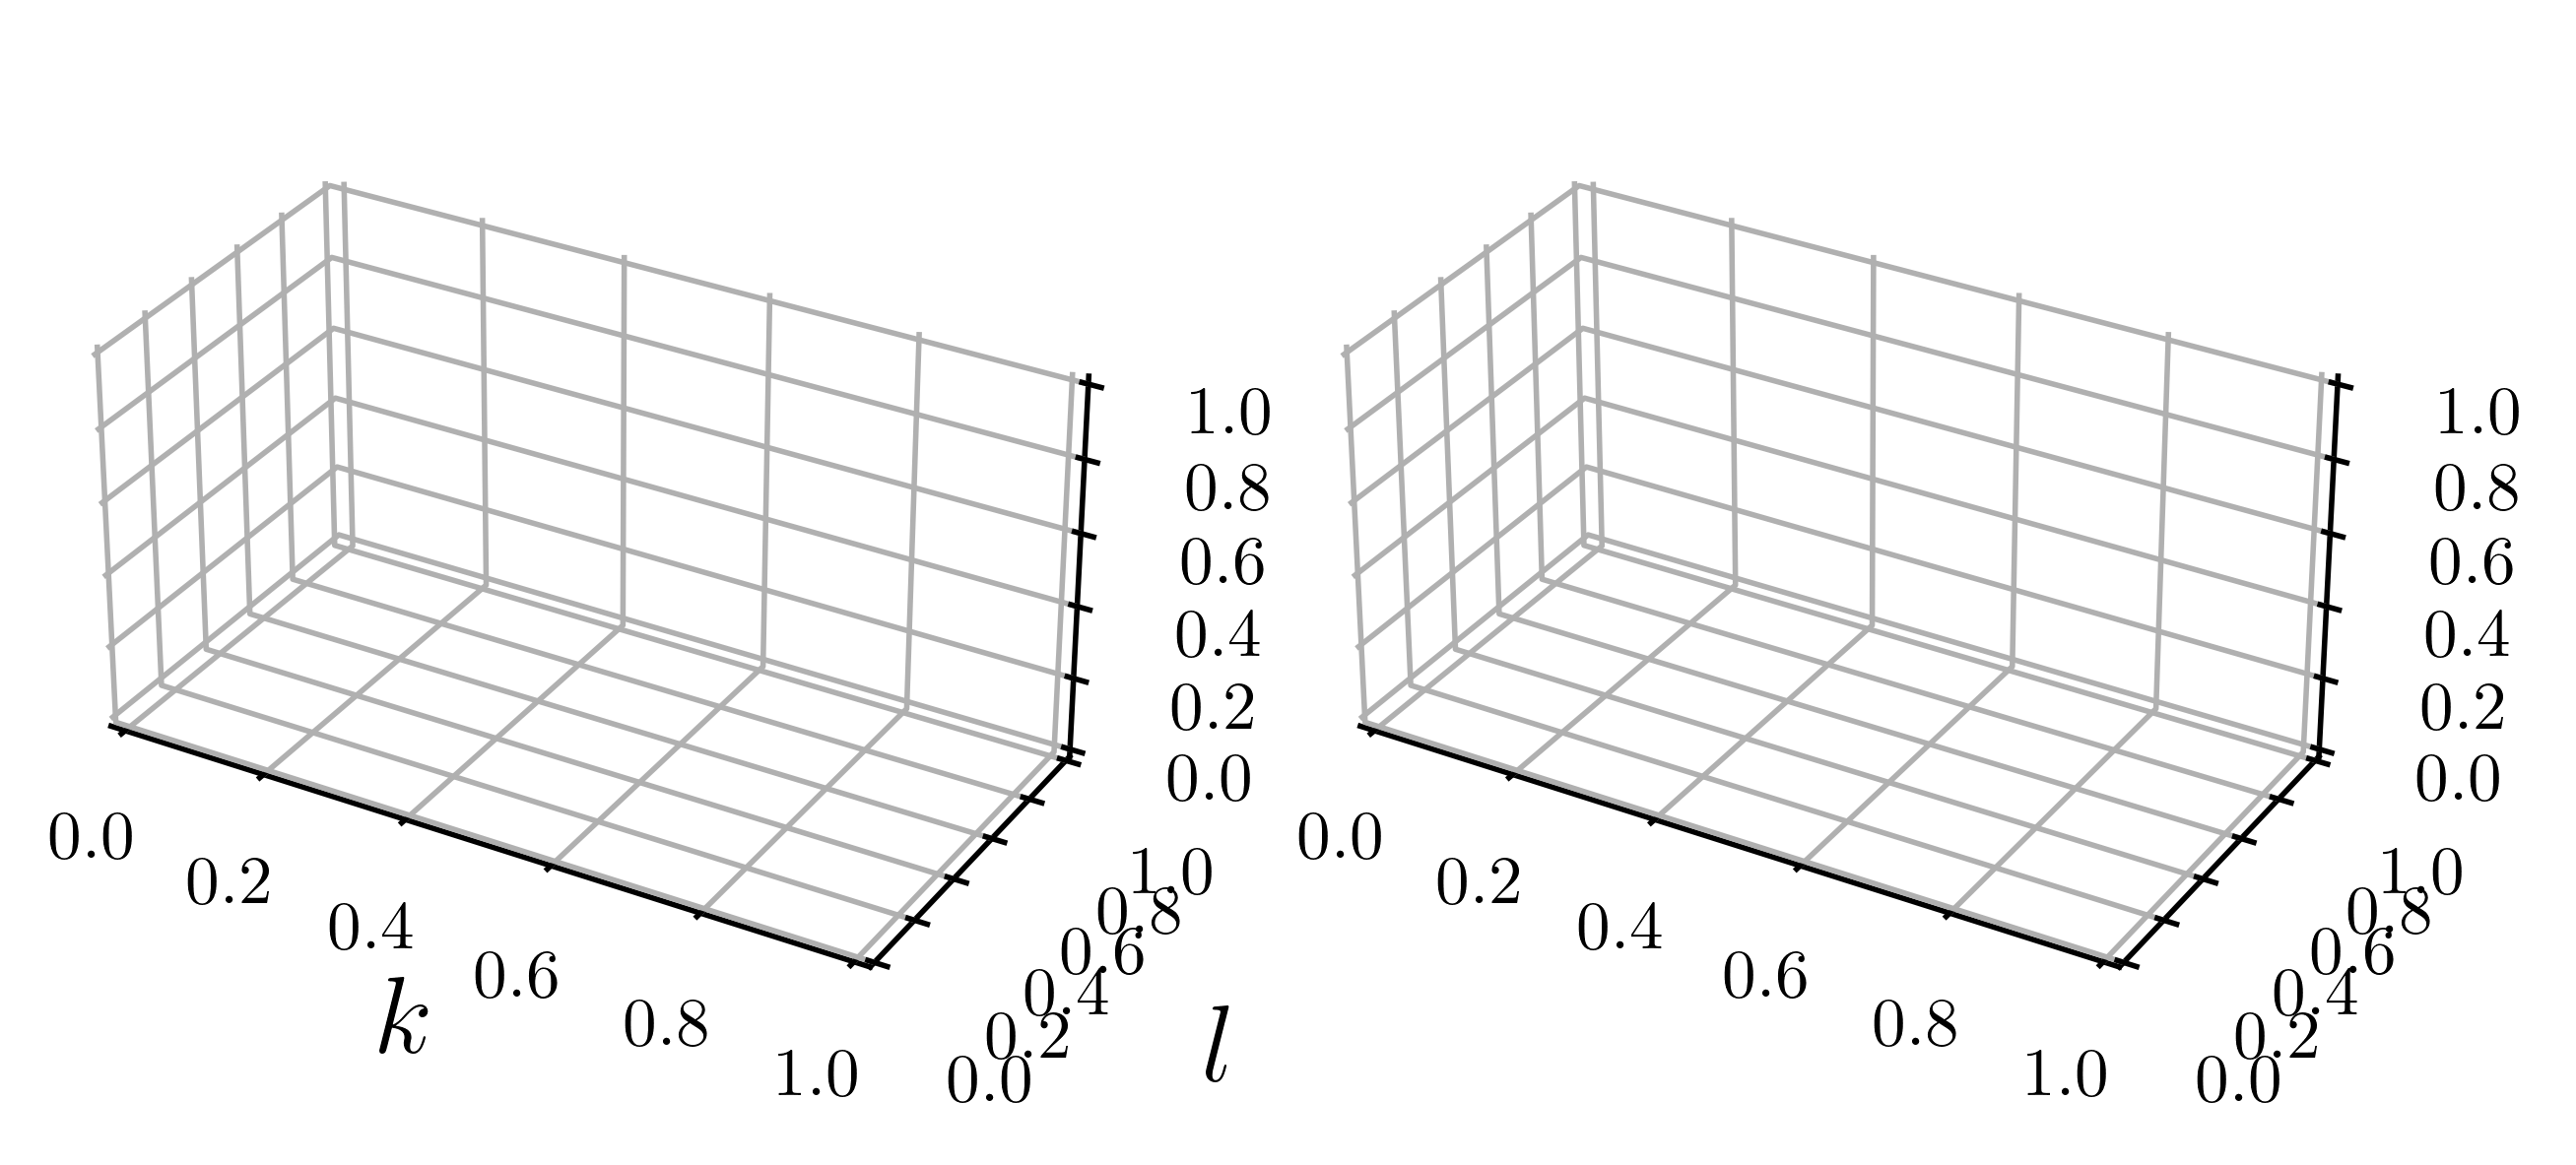

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})


fig = plt.figure(dpi=500)
ax = fig.add_subplot(1,2,1, projection="3d")
ax1 = fig.add_subplot(1,2,2, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)




# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=10, hspace=None)


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$l$", fontsize=16)
ax.zaxis.set_rotate_label(False) 
# ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax.set_box_aspect((2,1,1))
ax.grid([1])


ax1.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax1.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax1.set_xlabel("$k$", fontsize=16)
# ax1.set_ylabel("$l$", fontsize=16)
ax1.zaxis.set_rotate_label(False) 
# ax1.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax1.set_box_aspect((2,1,1))




colors = [
    '#0504aa',  # blue royal
    '#01ff07',  # green light
]



# Make data.
X = np.arange(Lx)
Y = np.arange(Ly)
X, Y = np.meshgrid(X, Y)


    
### For fractional charges, we plot A sites and B sites separately
### where A and B sites differ in Ly


prob_A_up = []
prob_B_up = []
for site_index, element in enumerate(density_up):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_up.append(0)
        prob_B_up.append(element)
    else:
        prob_A_up.append(element)
        prob_B_up.append(0)

prob_A_dn = []
prob_B_dn = []
for site_index, element in enumerate(density_dn):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_dn.append(0)
        prob_B_dn.append(element)
    else:
        prob_A_dn.append(element)
        prob_B_dn.append(0) 




col1 = np.full(np.reshape(prob_A_dn, (Ly, Lx)).shape, 'blue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_dn, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                          np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='k', linewidth=0, rstride=1, cstride=1,
                zorder=1, shade=False)



col1 = np.full(np.reshape(prob_A_up, (Ly, Lx)).shape, 'blue')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_up, (Ly, Lx)).shape, 'lime')
col2[Ly-1, :] = np.full(Lx, 'none')

ax1.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_dn, (Ly, Lx)), 
                          np.reshape(prob_B_dn, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='w', linewidth=0, rstride=1, cstride=1,
                zorder=1, shade=False)



ax.set_xticks(np.arange(0, Lx+1, Lx//5))
ax1.set_xticks(np.arange(0, Lx+1, Lx//2))

ax.set_yticks(np.arange(0, Ly+1, Ly//4))
ax1.set_yticks(np.arange(0, Ly+1, Ly//2))

ax1.set_zticks([0.04, 0.08])

ax.view_init(elev=20., azim=-50)
ax1.view_init(elev=20., azim=-50)

ax1.tick_params(axis='both', which='major', labelsize=16)

ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
             % tuple((energy_up, qa_up)))

ax1.set_title(r"$E = %1.5f, q_{A, \downarrow} = %1.5f $" 
             % tuple((energy_dn, qa_dn)))

# ax.grid(False)
# ax1.grid(False)


# fig.tight_layout(rect=[0.1, 0.2, 1, 1.1])
fig.tight_layout(w_pad=3)



# plt.savefig("prob_density_dope5_U5_G01.png")

/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_26801/636105439.py:87: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(np.append(X, X, axis=0),


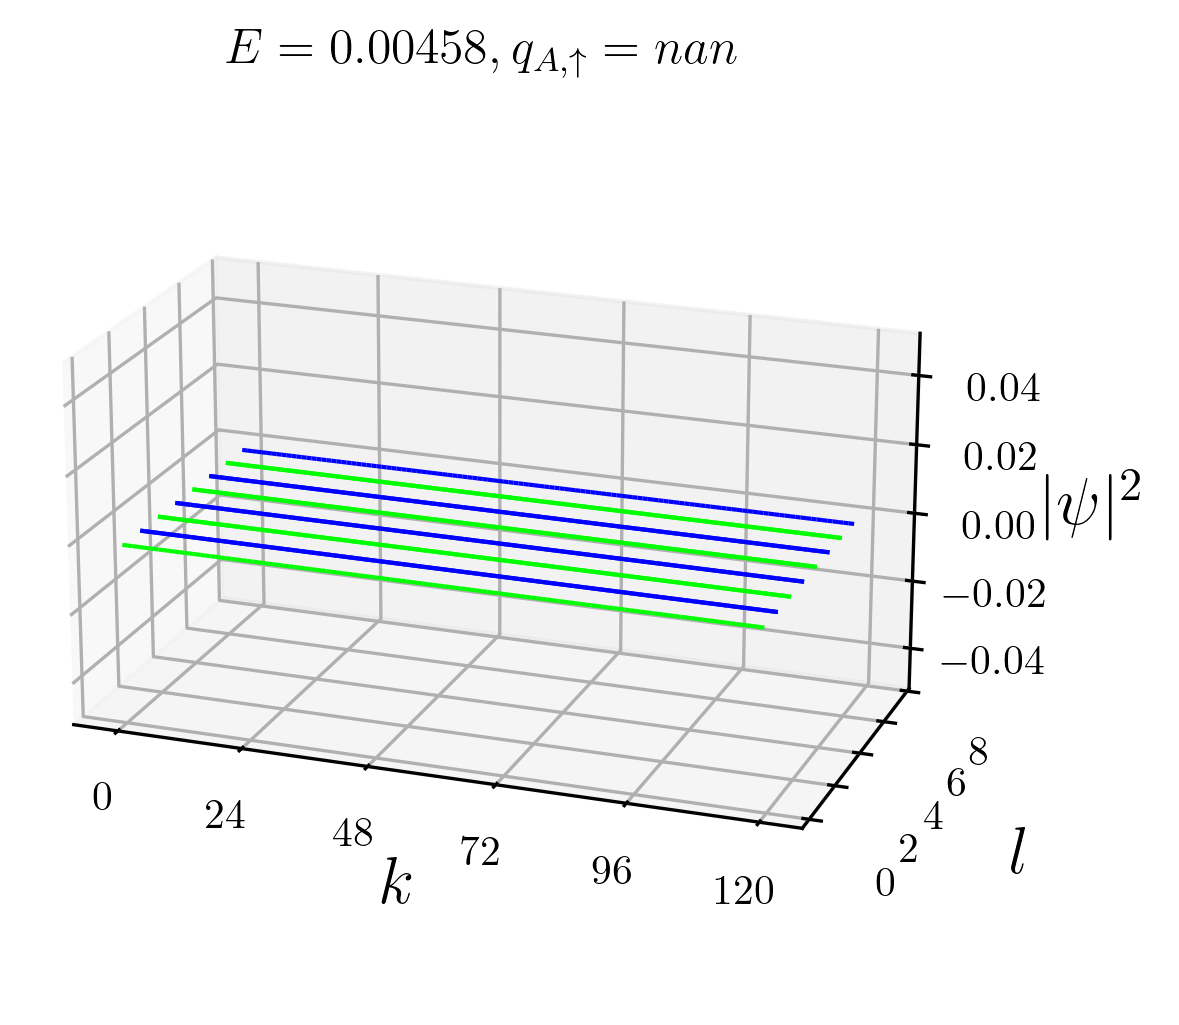

In [16]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1,1,1, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)




plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)


# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel("$k$", fontsize=16)
ax.set_ylabel("$l$", fontsize=16)
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
ax.set_box_aspect((2,1,1))
ax.grid([1])







colors = [
    '#0504aa',  # blue royal
    '#01ff07',  # green light
]



# Make data.
X = np.arange(Lx)
Y = np.arange(Ly)
X, Y = np.meshgrid(X, Y)


    
### For fractional charges, we plot A sites and B sites separately
### where A and B sites differ in Ly


prob_A_up = []
prob_B_up = []
for site_index, element in enumerate(density_up):
    yi = Ly - (site_index // Lx + 1) + 1
    if yi % 2 == 0:
        prob_A_up.append(0)
        prob_B_up.append(element)
    else:
        prob_A_up.append(element)
        prob_B_up.append(0)



col1 = np.full(np.reshape(prob_A_dn, (Ly, Lx)).shape, 'lime')
col1[Ly-1, :] = np.full(Lx, 'none')
col2 = np.full(np.reshape(prob_B_dn, (Ly, Lx)).shape, 'blue')
col2[Ly-1, :] = np.full(Lx, 'none')

ax.plot_surface(np.append(X, X, axis=0),
                np.append(Y, Y, axis=0),
                np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                          np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                  facecolors= np.append(col1, col2, axis=0),
                 antialiased=True, edgecolors='k', linewidth=1, rstride=1, cstride=1,
                zorder=1, shade=False)





ax.set_xticks(np.arange(0, Lx+1, Lx//5))

ax.set_yticks(np.arange(0, Ly+1, Ly//4))


ax.view_init(elev=20., azim=-70)


ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
             % tuple((energy_up, qa_up)))



# ax.grid(False)


# fig.tight_layout(rect=[0.1, 0.2, 1, 1.01])


# plt.savefig("prob_density_dope5_U5_G01.png")

plt.show()

/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_34253/133886839.py:4: RuntimeWarning: invalid value encountered in divide
  density = density/np.sum(density)
/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_34253/1912735391.py:76: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(np.append(X, X, axis=0),
/var/folders/8c/yvgv5fnx2nb77hcl4bw6dtzr0000gn/T/ipykernel_34253/1912735391.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(dpi=100)


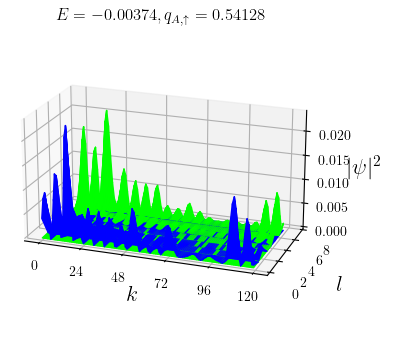

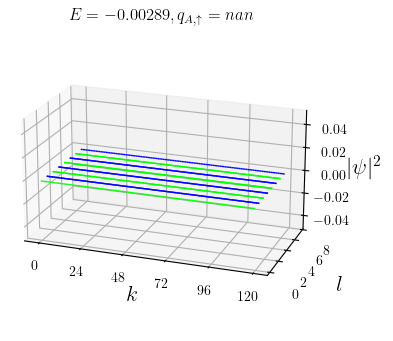

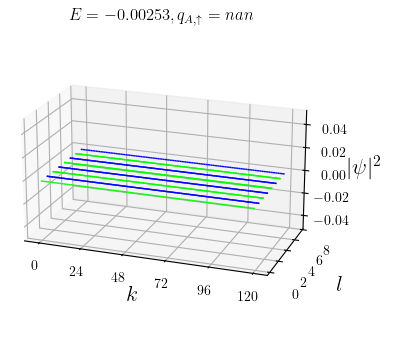

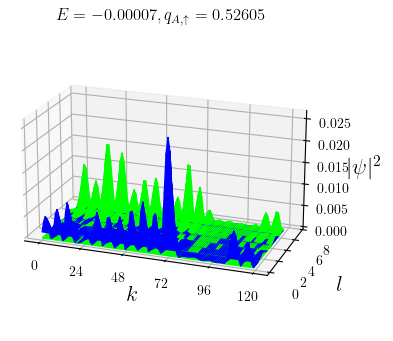

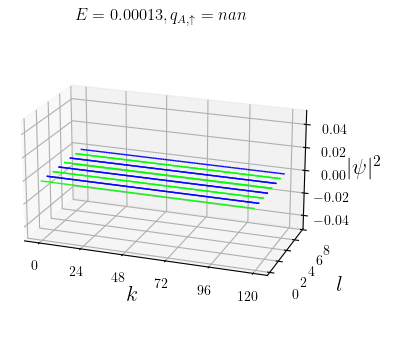

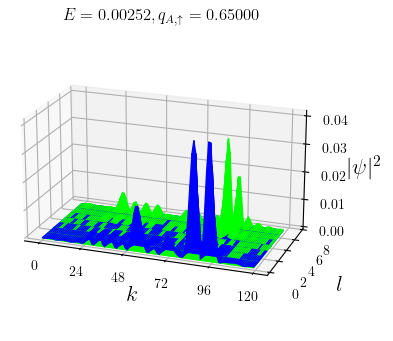

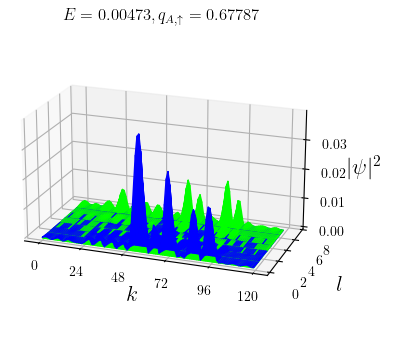

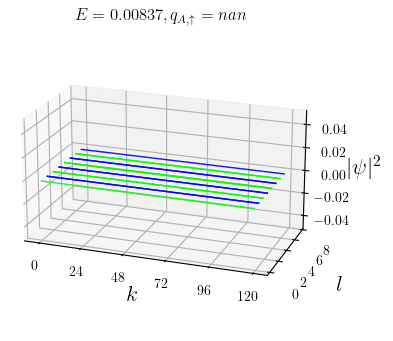

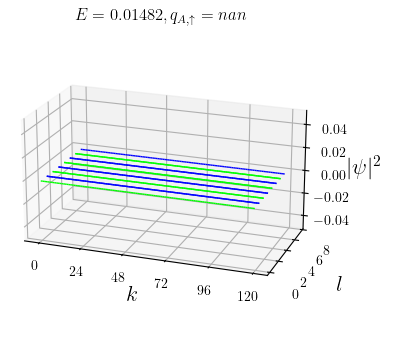

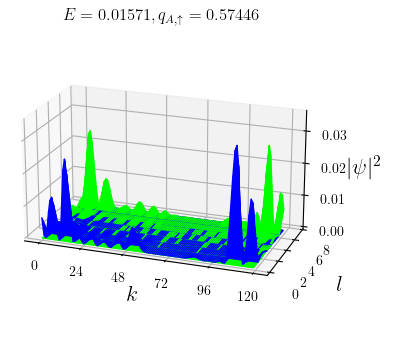

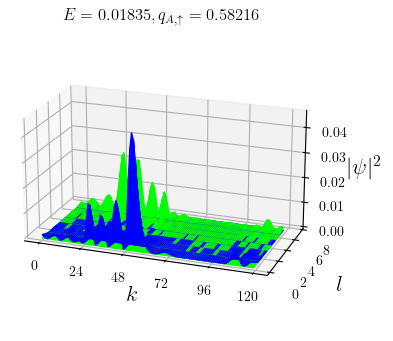

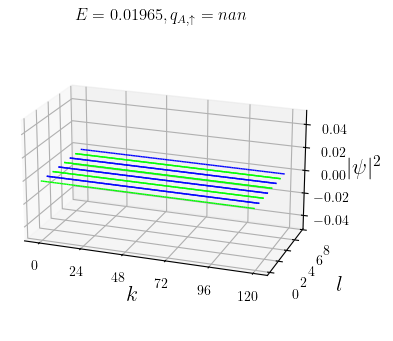

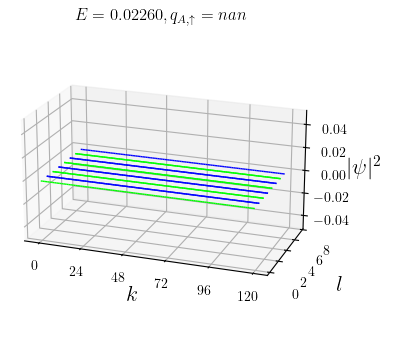

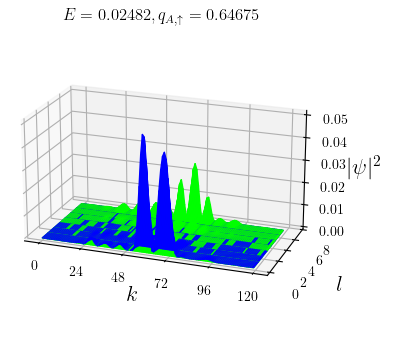

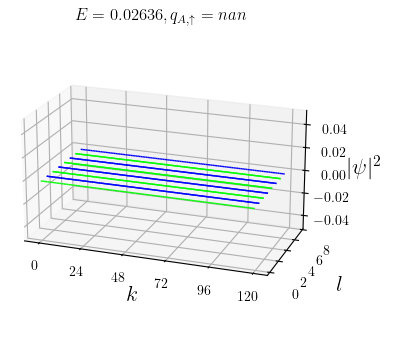

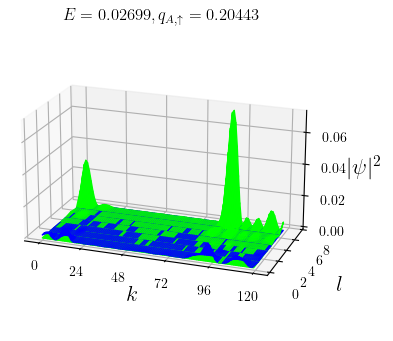

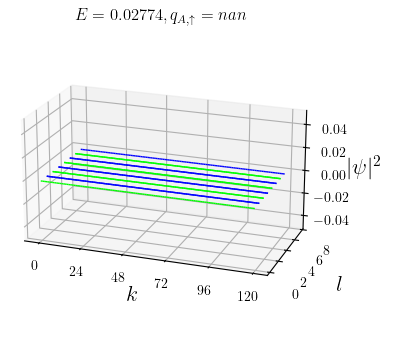

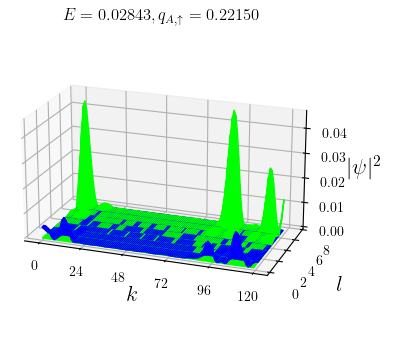

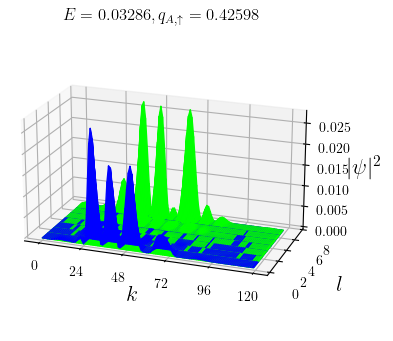

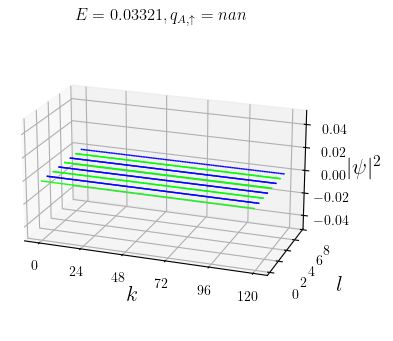

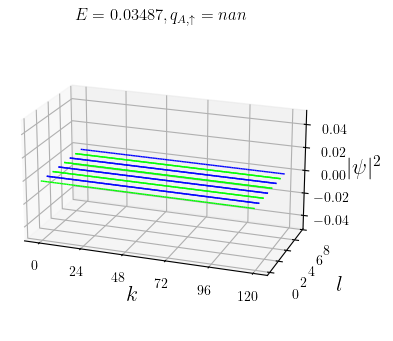

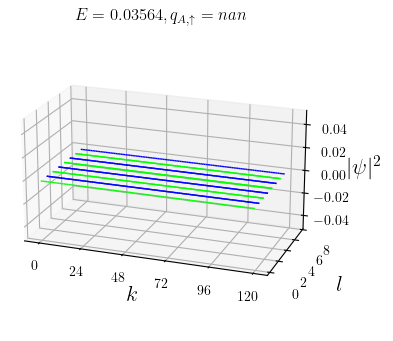

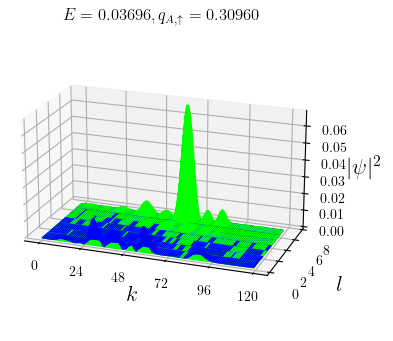

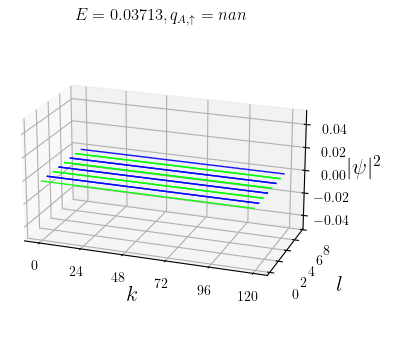

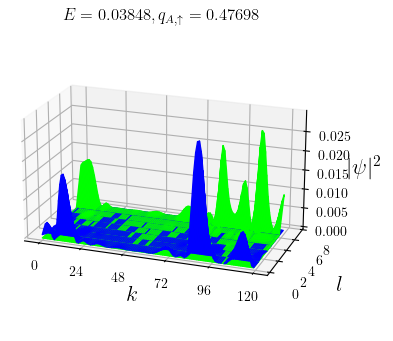

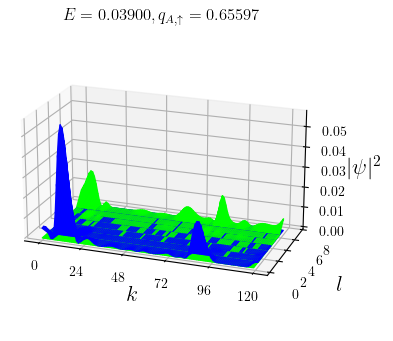

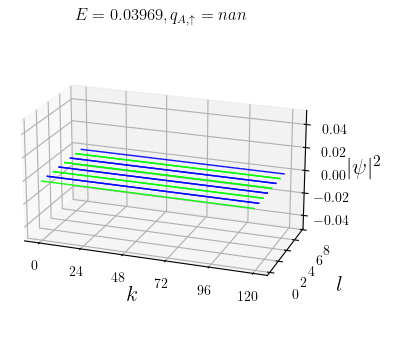

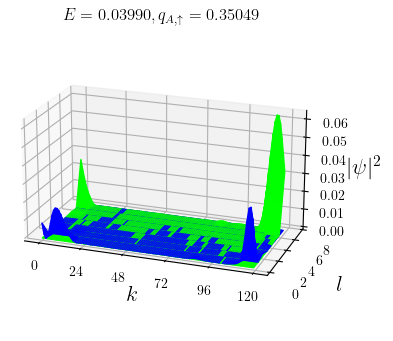

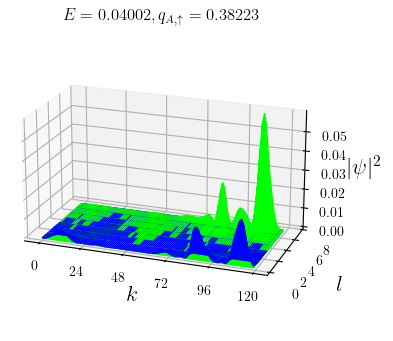

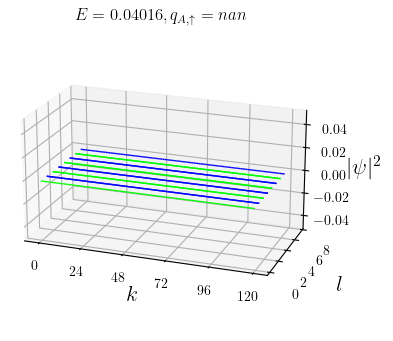

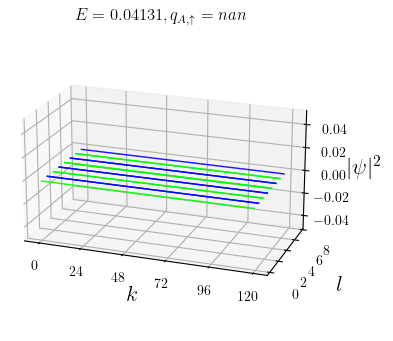

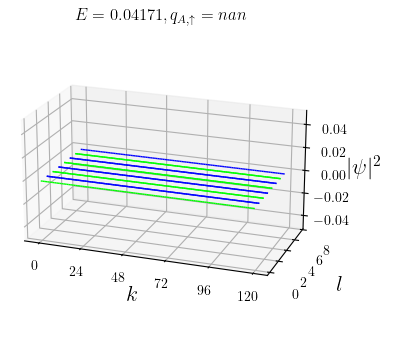

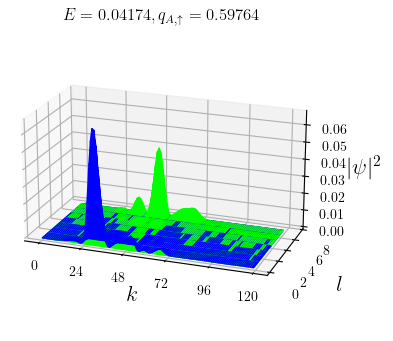

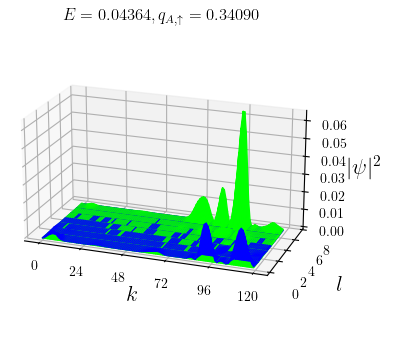

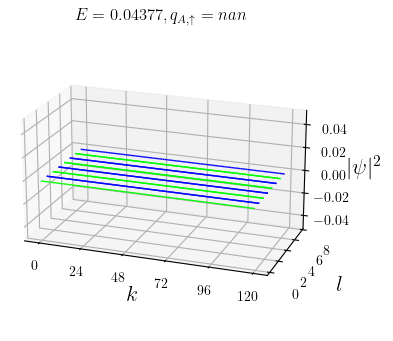

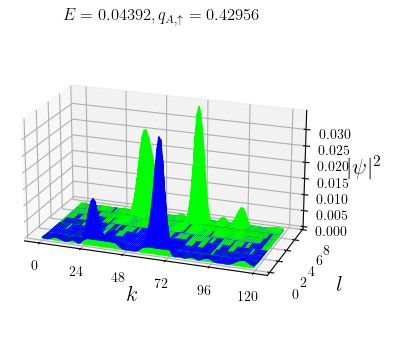

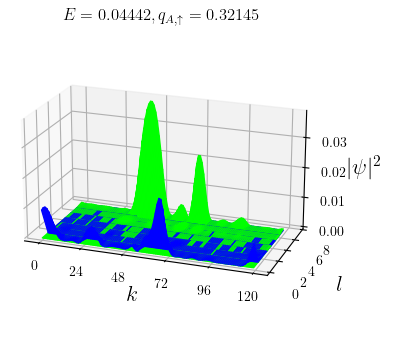

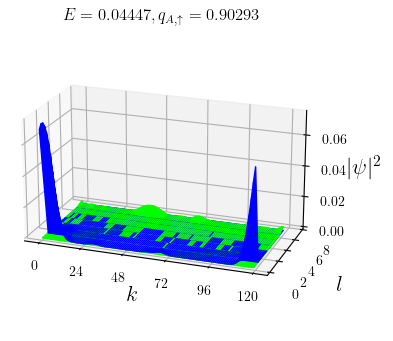

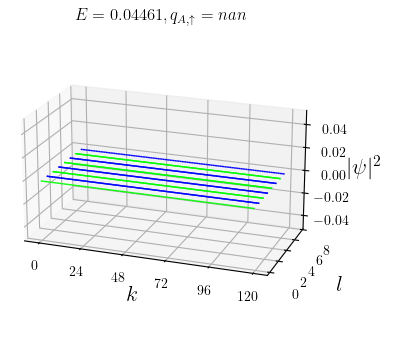

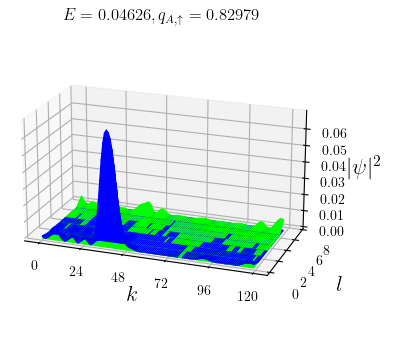

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.rcParams.update({'text.usetex': True})

# fig = plt.figure(dpi=300)
# ax = fig.add_subplot(1,1,1, projection="3d")


listA = []
listB = []
list_overlap = []


for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if yi % 2 == 0:
        listA.append(i)
    else:
        listB.append(i)

for i in range(Lx * Ly):
    yi = Ly - (i // Lx + 1) + 1
    if Ly/2 -1 <= yi <= Ly/2:
        list_overlap.append(i)



for ORDER_up in range(20, 60):
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1, projection="3d")
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
    # ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel("$k$", fontsize=16)
    ax.set_ylabel("$l$", fontsize=16)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel("$| \psi |^2$", fontsize=16, rotation=0)
    ax.set_box_aspect((2,1,1))
    ax.grid([1])
    colors = [
        '#0504aa',  # blue royal
        '#01ff07',  # green light
    ]
    # Make data.
    X = np.arange(Lx)
    Y = np.arange(Ly)
    X, Y = np.meshgrid(X, Y)
    # For fractional charges, we plot A sites and B sites separately
    # where A and B sites differ in Ly
    ###########
    # ORDER_up = i
    density_up = prob_density(vec_up, ORDER_up, Lx, Ly)
    qa_up = np.sum(np.take(prob_density(vec_up, ORDER_up, Lx, Ly), listA))
    energy_up = val[ORDER_up]
    ###########
    prob_A_up = []
    prob_B_up = []
    for site_index, element in enumerate(density_up):
        yi = Ly - (site_index // Lx + 1) + 1
        if yi % 2 == 0:
            prob_A_up.append(0)
            prob_B_up.append(element)
        else:
            prob_A_up.append(element)
            prob_B_up.append(0)

    col1 = np.full(np.reshape(prob_A_up, (Ly, Lx)).shape, 'lime')
    col1[Ly-1, :] = np.full(Lx, 'none')
    col2 = np.full(np.reshape(prob_B_up, (Ly, Lx)).shape, 'blue')
    col2[Ly-1, :] = np.full(Lx, 'none')

    ax.plot_surface(np.append(X, X, axis=0),
                    np.append(Y, Y, axis=0),
                    np.append(np.reshape(prob_A_up, (Ly, Lx)), 
                            np.reshape(prob_B_up, (Ly, Lx)), axis=0),
                    facecolors= np.append(col1, col2, axis=0),
                    antialiased=True, edgecolors='k', linewidth=1, rstride=1, cstride=1,
                    zorder=1, shade=False)

    ax.set_xticks(np.arange(0, Lx+1, Lx//5))
    ax.set_yticks(np.arange(0, Ly+1, Ly//4))
    ax.view_init(elev=20., azim=-70)
    ax.set_title(r"$E = %1.5f, q_{A, \uparrow} = %1.5f $" 
                % tuple((energy_up, qa_up)))

    # plt.show()